<a href="https://www.kaggle.com/code/zafarali27/question-pairs-dataset?scriptVersionId=212736329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question-pairs-dataset/questions.csv


# Import Libarays 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv("/kaggle/input/question-pairs-dataset/questions.csv")

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404351, 6)

In [6]:
df = df.sample(30000,random_state=2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 339499 to 174228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [8]:
# Missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
df.dropna(inplace=True)

# Distribution of duplicate and non-duplicate questins

is_duplicate
0    18918
1    11082
Name: count, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>

is_duplicate
0    63.06
1    36.94
Name: count, dtype: float64
<<<<<<<<<<<<<<<<<<<<<<<<<<



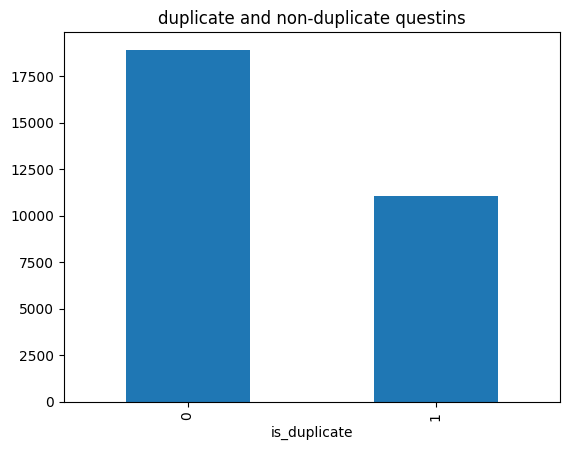

In [10]:
print(df["is_duplicate"].value_counts())
print(">>>>>>>>>>>>>>>>>>>>>>>>>>\n")

print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)
print("<<<<<<<<<<<<<<<<<<<<<<<<<<\n")

df["is_duplicate"].value_counts().plot(kind="bar",title="duplicate and non-duplicate questins")
plt.show()

# Repeated Questions

In [11]:
qid = pd.Series(df["qid1"].tolist() + df["qid2"].to_list())
print("Nuber of unique question ", np.unique(qid).shape[0])

x = qid.value_counts()>1
print("Number of question getting repeated",x[x].shape[0])

Nuber of unique question  59795
Number of question getting repeated 176


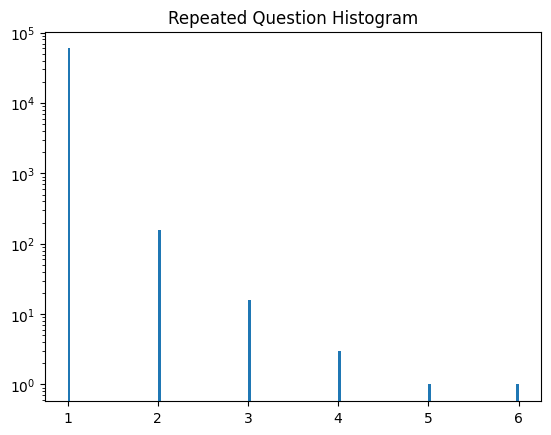

In [12]:
plt.hist(qid.value_counts().values,bins=160)
plt.title("Repeated Question Histogram")
plt.yscale("log")
plt.show()

# Feature Engineering

In [13]:
df["q1_len"] = df["question1"].str.len()
df["q2_len"] = df["question2"].str.len()

In [14]:
df["q_1_num_words"]= df["question1"].apply(lambda row: len(row.split(" ")))
df["q_2_num_words"]= df["question2"].apply(lambda row: len(row.split(" ")))

In [15]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row["question2"].split(" ")))
    return len(w1 & w2)

In [16]:
df["word_common"] = df.apply(common_words,axis = 1)

In [17]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row["question2"].split(" ")))
    return (len(w1) + len(w2))

In [18]:
df["word_total"] = df.apply(total_words,axis = 1)

In [19]:
df["word_share"] = round(df["word_common"]/df["word_total"],2)

# Analysis of Feature

minimum characters 2
>>>>>>>>>>>>>>>>>>>>>>>>>>

maximum characters 332
>>>>>>>>>>>>>>>>>>>>>>>>>>

average num of characters 59


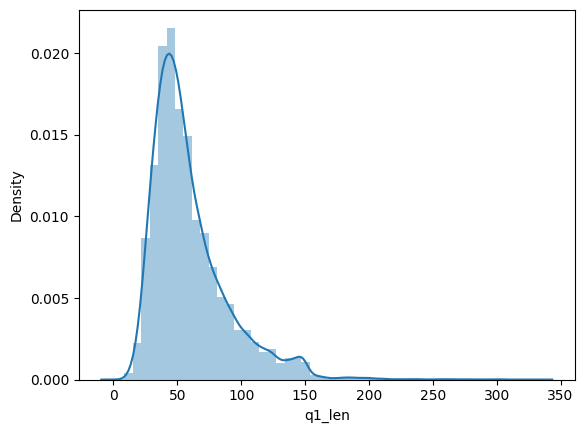

In [20]:
sns.distplot(df["q1_len"])
print("minimum characters",df["q1_len"].min())
print(">>>>>>>>>>>>>>>>>>>>>>>>>>\n")

print("maximum characters",df["q1_len"].max())
print(">>>>>>>>>>>>>>>>>>>>>>>>>>\n")

print("average num of characters",int(df["q1_len"].mean()))

minimum characters 1
>>>>>>>>>>>>>>>>>>>>>>>>>>

maximum characters 63
>>>>>>>>>>>>>>>>>>>>>>>>>>

average num of words 10


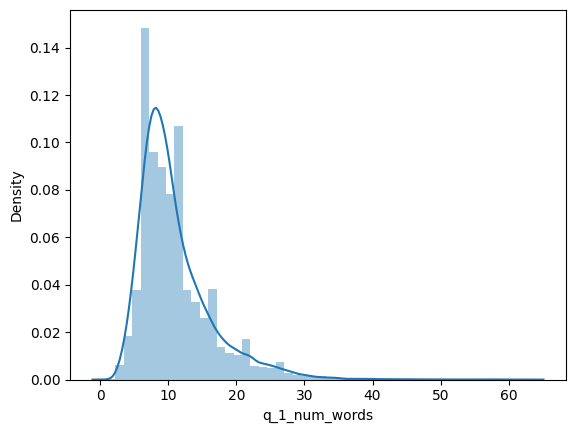

In [21]:
sns.distplot(df["q_1_num_words"])
print("minimum characters",df["q_1_num_words"].min())
print(">>>>>>>>>>>>>>>>>>>>>>>>>>\n")

print("maximum characters",df["q_1_num_words"].max())
print(">>>>>>>>>>>>>>>>>>>>>>>>>>\n")

print("average num of words",int(df["q_1_num_words"].mean()))

# Common Words

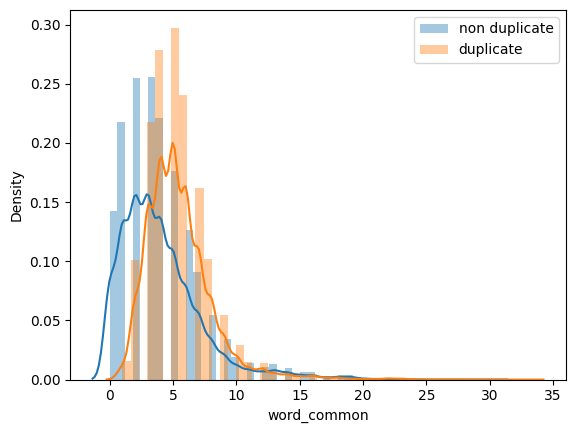

In [22]:
sns.distplot(df[df["is_duplicate"] == 0 ] ["word_common"],label="non duplicate")
sns.distplot(df[df["is_duplicate"] == 1 ] ["word_common"],label="duplicate")
plt.legend()
plt.show()

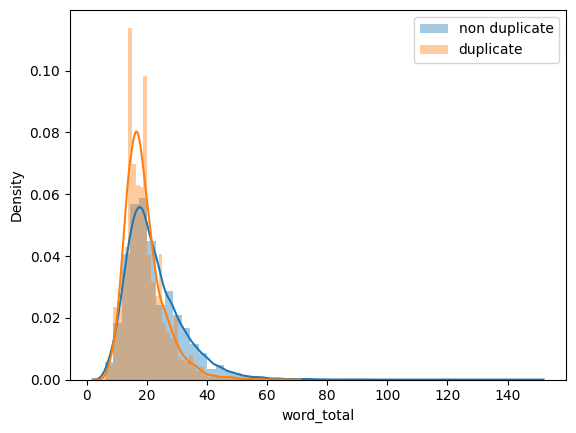

In [23]:
sns.distplot(df[df["is_duplicate"] == 0 ] ["word_total"],label="non duplicate")
sns.distplot(df[df["is_duplicate"] == 1 ] ["word_total"],label="duplicate")
plt.legend()
plt.show()

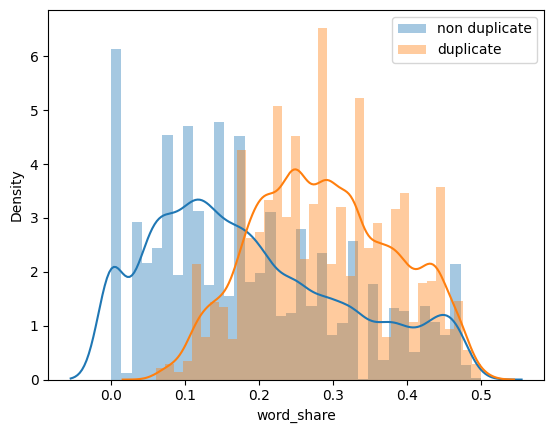

In [24]:
sns.distplot(df[df["is_duplicate"] == 0 ] ["word_share"],label="non duplicate")
sns.distplot(df[df["is_duplicate"] == 1 ] ["word_share"],label="duplicate")
plt.legend()
plt.show()

In [25]:
ques_df = df[["question1","question2"]]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [26]:
final_df = df.drop(columns = ["id","qid1","qid2","question1","question2"])
final_df.shape
final_df.head()

,is_duplicate,q1_len,q2_len,q_1_num_words,q_2_num_words,word_common,word_total,word_share
339499,1,58,42,11,8,4,19,0.21
289521,0,52,105,11,22,2,32,0.06
4665,0,125,124,24,24,20,42,0.48
54203,1,45,60,8,10,5,18,0.28
132566,0,54,39,11,8,3,19,0.16


In [27]:
from sklearn.feature_extraction.text import CountVectorizer


#merge text
questions = list(ques_df["question1"]) + list(ques_df["question2"])

cv = CountVectorizer(max_features = 3000)

q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [28]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis = 1)
temp_df.shape

(30000, 6000)

In [29]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q_1_num_words,q_2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7658333333333334

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7691666666666667